In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
df = pd.read_csv("/content/sample_data/Twitter_Data_Sample.csv")


In [ ]:
df.head()

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [ ]:
df.columns

Index(['clean_text'], dtype='object')

In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()
df['scores']=df['clean_text'].apply(lambda text:sia.polarity_scores(text))
df.head()

,clean_text,scores
0,when modi promised “minimum government maximum...,"{'neg': 0.065, 'neu': 0.781, 'pos': 0.154, 'co..."
1,talk all the nonsense and continue all the dra...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp..."
2,what did just say vote for modi welcome bjp t...,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp..."
3,asking his supporters prefix chowkidar their n...,"{'neg': 0.187, 'neu': 0.655, 'pos': 0.158, 'co..."
4,answer who among these the most powerful world...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp..."


In [ ]:
df['compound']=df['scores'].apply(lambda dic:dic['compound'])
df['positive']=df['scores'].apply(lambda dic:dic['pos'])
df['negative']=df['scores'].apply(lambda dic:dic['neg'])
df['neutral']=df['scores'].apply(lambda dic:dic['neu'])
df['type']=''
df.loc[df.compound>0,'type']='POS'
df.loc[df.compound==0,'type']='NEUTRAL'
df.loc[df.compound<0,'type']='NEG'
df.head(100)

,clean_text,scores,positive,negative,neutral,type,compound
0,when modi promised “minimum government maximum...,"{'neg': 0.065, 'neu': 0.781, 'pos': 0.154, 'co...",0.154,0.065,0.781,POS,0.5267
1,talk all the nonsense and continue all the dra...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",0.000,0.184,0.816,NEG,-0.4019
2,what did just say vote for modi welcome bjp t...,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.228,0.000,0.772,POS,0.7096
3,asking his supporters prefix chowkidar their n...,"{'neg': 0.187, 'neu': 0.655, 'pos': 0.158, 'co...",0.158,0.187,0.655,NEG,-0.0713
4,answer who among these the most powerful world...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.192,0.000,0.808,POS,0.4754
...,...,...,...,...,...,...,...
95,country prospers when the women the country ar...,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...",0.060,0.000,0.940,POS,0.3182
96,sabbash mera vote for peppermit abvp,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,NEUTRAL,0.0000
97,yogi adityanath hold 100 rallies seek votes fo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,NEUTRAL,0.0000
98,from the very beginningmodi doing wada faramos...,"{'neg': 0.1, 'neu': 0.669, 'pos': 0.231, 'comp...",0.231,0.100,0.669,POS,0.5106


In [ ]:
df[['clean_text','compound','type']].head(30)

,clean_text,compound,type
0,when modi promised “minimum government maximum...,0.5267,POS
1,talk all the nonsense and continue all the dra...,-0.4019,NEG
2,what did just say vote for modi welcome bjp t...,0.7096,POS
3,asking his supporters prefix chowkidar their n...,-0.0713,NEG
4,answer who among these the most powerful world...,0.4754,POS
5,kiya tho refresh maarkefir comment karo,0.0000,NEUTRAL
6,surat women perform yagna seeks divine grace f...,0.7506,POS
7,this comes from cabinet which has scholars lik...,0.3612,POS
8,with upcoming election india saga going import...,0.2023,POS
9,gandhi was gay does modi,0.0000,NEUTRAL


In [ ]:
output_csv_path='/content/sample_data/results_ver2.csv'
df.to_csv(output_csv_path,index=False)


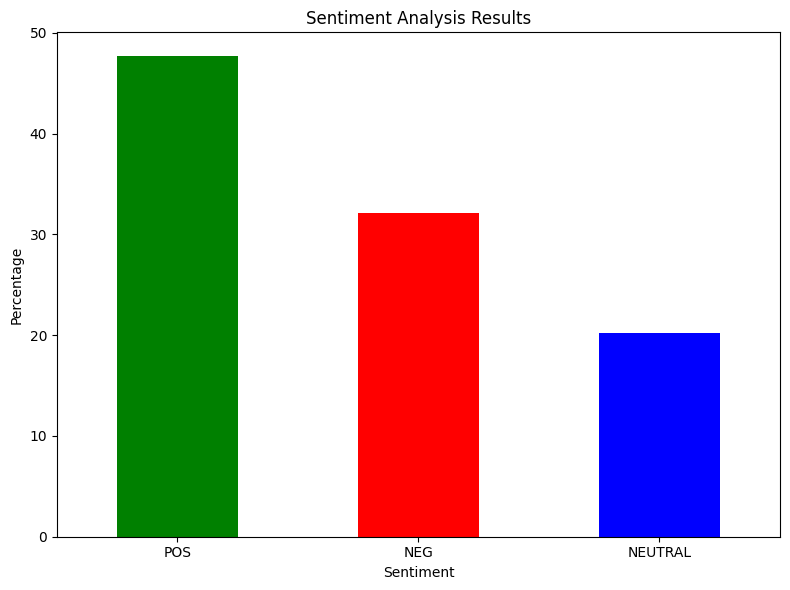

In [ ]:
sentiment_counts=df['type'].value_counts(normalize=True)*100
plt.figure(figsize=(8,6))
plt.title('Sentiment Analysis Results')
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()